In [10]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

## CONTENTS 
 - model (without polynomial features)
 - model (with polynomial features)

x train and y train shape :  (160, 1) (160, 1)


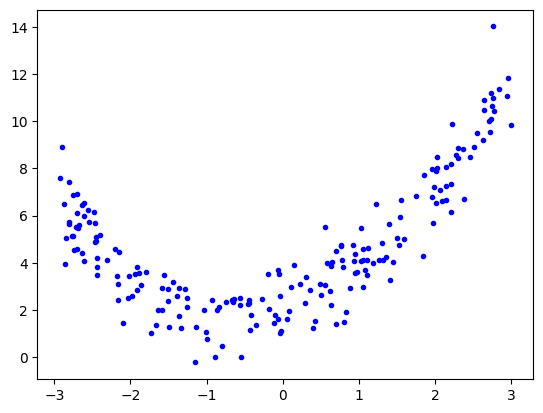

In [11]:
#general model

x = 6 * np.random.rand(200, 1) - 3
y =  0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200, 1)

# y = 0.7x^3 +  0.8x^2 +  0.9x + noise 


x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=42)
print("x train and y train shape : ",x_train.shape,y_train.shape)
plt.plot(x,y,"b.")
plt.show()

#### Model building without effect 

coefs and bias :  [[0.67962199]] [4.57984829]
r2 score :  0.30540661819025905


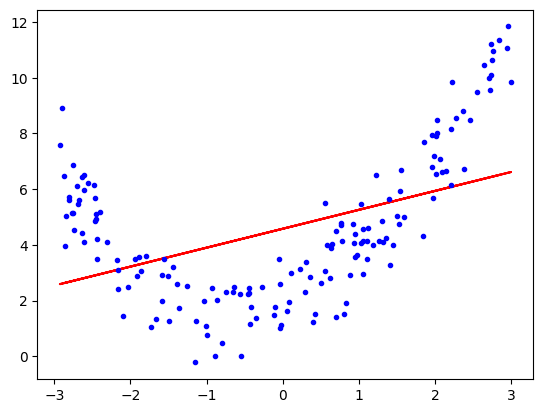

In [12]:
model = LinearRegression()
model.fit(x_train,y_train)
r2_score_ = r2_score(y_test,model.predict(x_test))
print("coefs and bias : ",model.coef_,model.intercept_)
print("r2 score : ",r2_score_)
plt.plot(x_train,model.predict(x_train),color='red')
plt.plot(x_train,y_train,"b.")
plt.show()

#### Model building with polynomial features 

In [13]:
poly =  PolynomialFeatures(degree=2,include_bias=True)
x_train_new  = poly.fit_transform(x_train)
x_test_new  = poly.transform(x_test)
print(x_train_new[0],x_train[0])
print("X  train new shape : ",x_train_new.shape)


[1.         2.84121866 8.07252347] [2.84121866]
X  train new shape :  (160, 3)


In [17]:
model_ = LinearRegression()
model_.fit(x_train_new,y_train)
print("Coefs and Bias :",model_.coef_,model.intercept_)
r2_score(y_test,model_.predict(x_test_new))

Coefs and Bias : [[0.         0.89849902 0.78859137]] [4.57984829]


0.8969936514127251

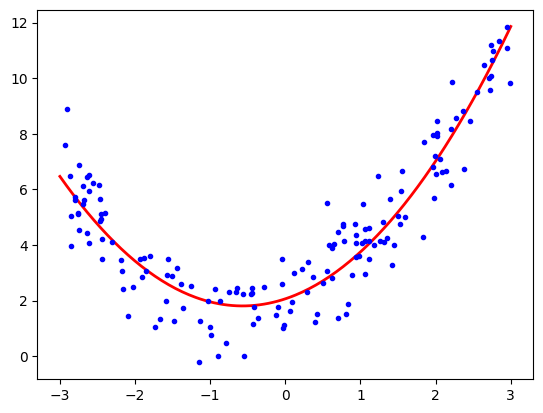

In [15]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_trans  = poly.transform(x_new)
y_pred  =  model_.predict(x_new_trans)

plt.plot(x_new,model_.predict(x_new_trans),linewidth=2,color='red')
plt.plot(x_train,y_train,"b.")
plt.show()